<a href="https://www.kaggle.com/code/mohammedhannnane/apple-stock-price-analysis?scriptVersionId=180949498" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Apple Stock Price Analysis 
# 

In [1]:
import numpy as np # num operations
import pandas as pd # data manipulation 

# Cleaner Output
import warnings
warnings.filterwarnings("ignore")

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Date time
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

import warnings

In [2]:
# Load the Apple stock price dataset
df = pd.read_csv('/kaggle/input/apple-stock-price-dataset/Apple Dataset.csv')
# Display the dataframe
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...,...
10949,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
10952,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900


In [3]:
# Display the first rows
df.head

<bound method NDFrame.head of              Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099058   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093890   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086999   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089152   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091737   
...           ...         ...         ...         ...         ...         ...   
10949  2024-05-20  189.330002  191.919998  189.009995  191.039993  191.039993   
10950  2024-05-21  191.089996  192.729996  190.919998  192.350006  192.350006   
10951  2024-05-22  192.270004  192.820007  190.270004  190.899994  190.899994   
10952  2024-05-23  190.979996  191.000000  186.630005  186.880005  186.880005   
10953  2024-05-24  188.820007  190.580002  188.039993  189.979996  189.979996  

In [4]:
# Show the dimentsions of the dataframe
df.shape

(10954, 7)

In [5]:
# Display dataframe information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10954 non-null  object 
 1   Open       10954 non-null  float64
 2   High       10954 non-null  float64
 3   Low        10954 non-null  float64
 4   Close      10954 non-null  float64
 5   Adj Close  10954 non-null  float64
 6   Volume     10954 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 599.2+ KB


In [6]:
# List of dataframe columns 
df.columns.to_list()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [7]:
# Summary Statistics of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,10954.0,2.153088e+01,4.445839e+01,0.049665,2.968750e-01,5.223210e-01,1.976750e+01,1.980200e+02
High,10954.0,2.176190e+01,4.493186e+01,0.049665,3.035710e-01,5.334820e-01,1.988857e+01,1.996200e+02
Low,10954.0,2.130822e+01,4.401358e+01,0.049107,2.901790e-01,5.133930e-01,1.945777e+01,1.970000e+02
Close,10954.0,2.154407e+01,4.449248e+01,0.049107,2.968750e-01,5.245540e-01,1.968268e+01,1.981100e+02
Adj Close,10954.0,2.074751e+01,4.403894e+01,0.037900,2.416240e-01,4.273330e-01,1.704805e+01,1.975895e+02
Volume,10954.0,3.190792e+08,3.357446e+08,0.000000,1.139936e+08,2.067128e+08,3.993444e+08,7.421641e+09


In [8]:
# Summary statistics including all data types
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,10954,10954,1980-12-12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,10954.0,NaN,NaN,NaN,21.530877,44.458386,0.049665,0.296875,0.522321,19.7675,198.020004
High,10954.0,NaN,NaN,NaN,21.761904,44.931856,0.049665,0.303571,0.533482,19.888572,199.619995
Low,10954.0,NaN,NaN,NaN,21.30822,44.013578,0.049107,0.290179,0.513393,19.457768,197.0
Close,10954.0,NaN,NaN,NaN,21.544072,44.492483,0.049107,0.296875,0.524554,19.682679,198.110001
Adj Close,10954.0,NaN,NaN,NaN,20.747506,44.038943,0.0379,0.241624,0.427333,17.048054,197.589523
Volume,10954.0,NaN,NaN,NaN,319079187.92222,335744568.600754,0.0,113993575.0,206712800.0,399344400.0,7421640800.0


In [9]:
# Count missing values in each column
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# Count duplicated rows in the dataframe
df.duplicated().sum()

0

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...,...
10949,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
10952,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900


<Axes: xlabel='Volume', ylabel='Date'>

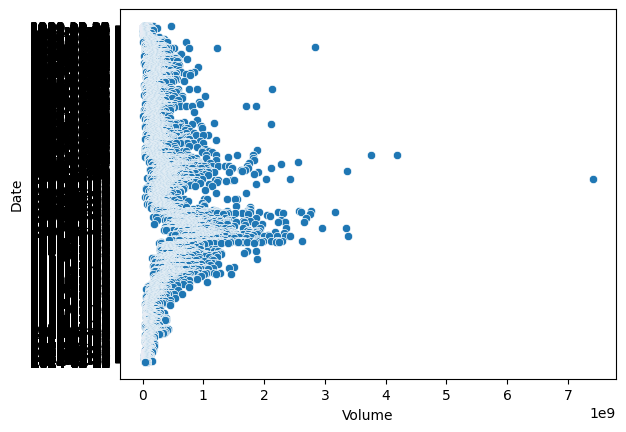

In [12]:
# Scatter plot of 'Volume' vs 'Date'
sns.scatterplot(x = 'Volume', y = 'Date', data = df)

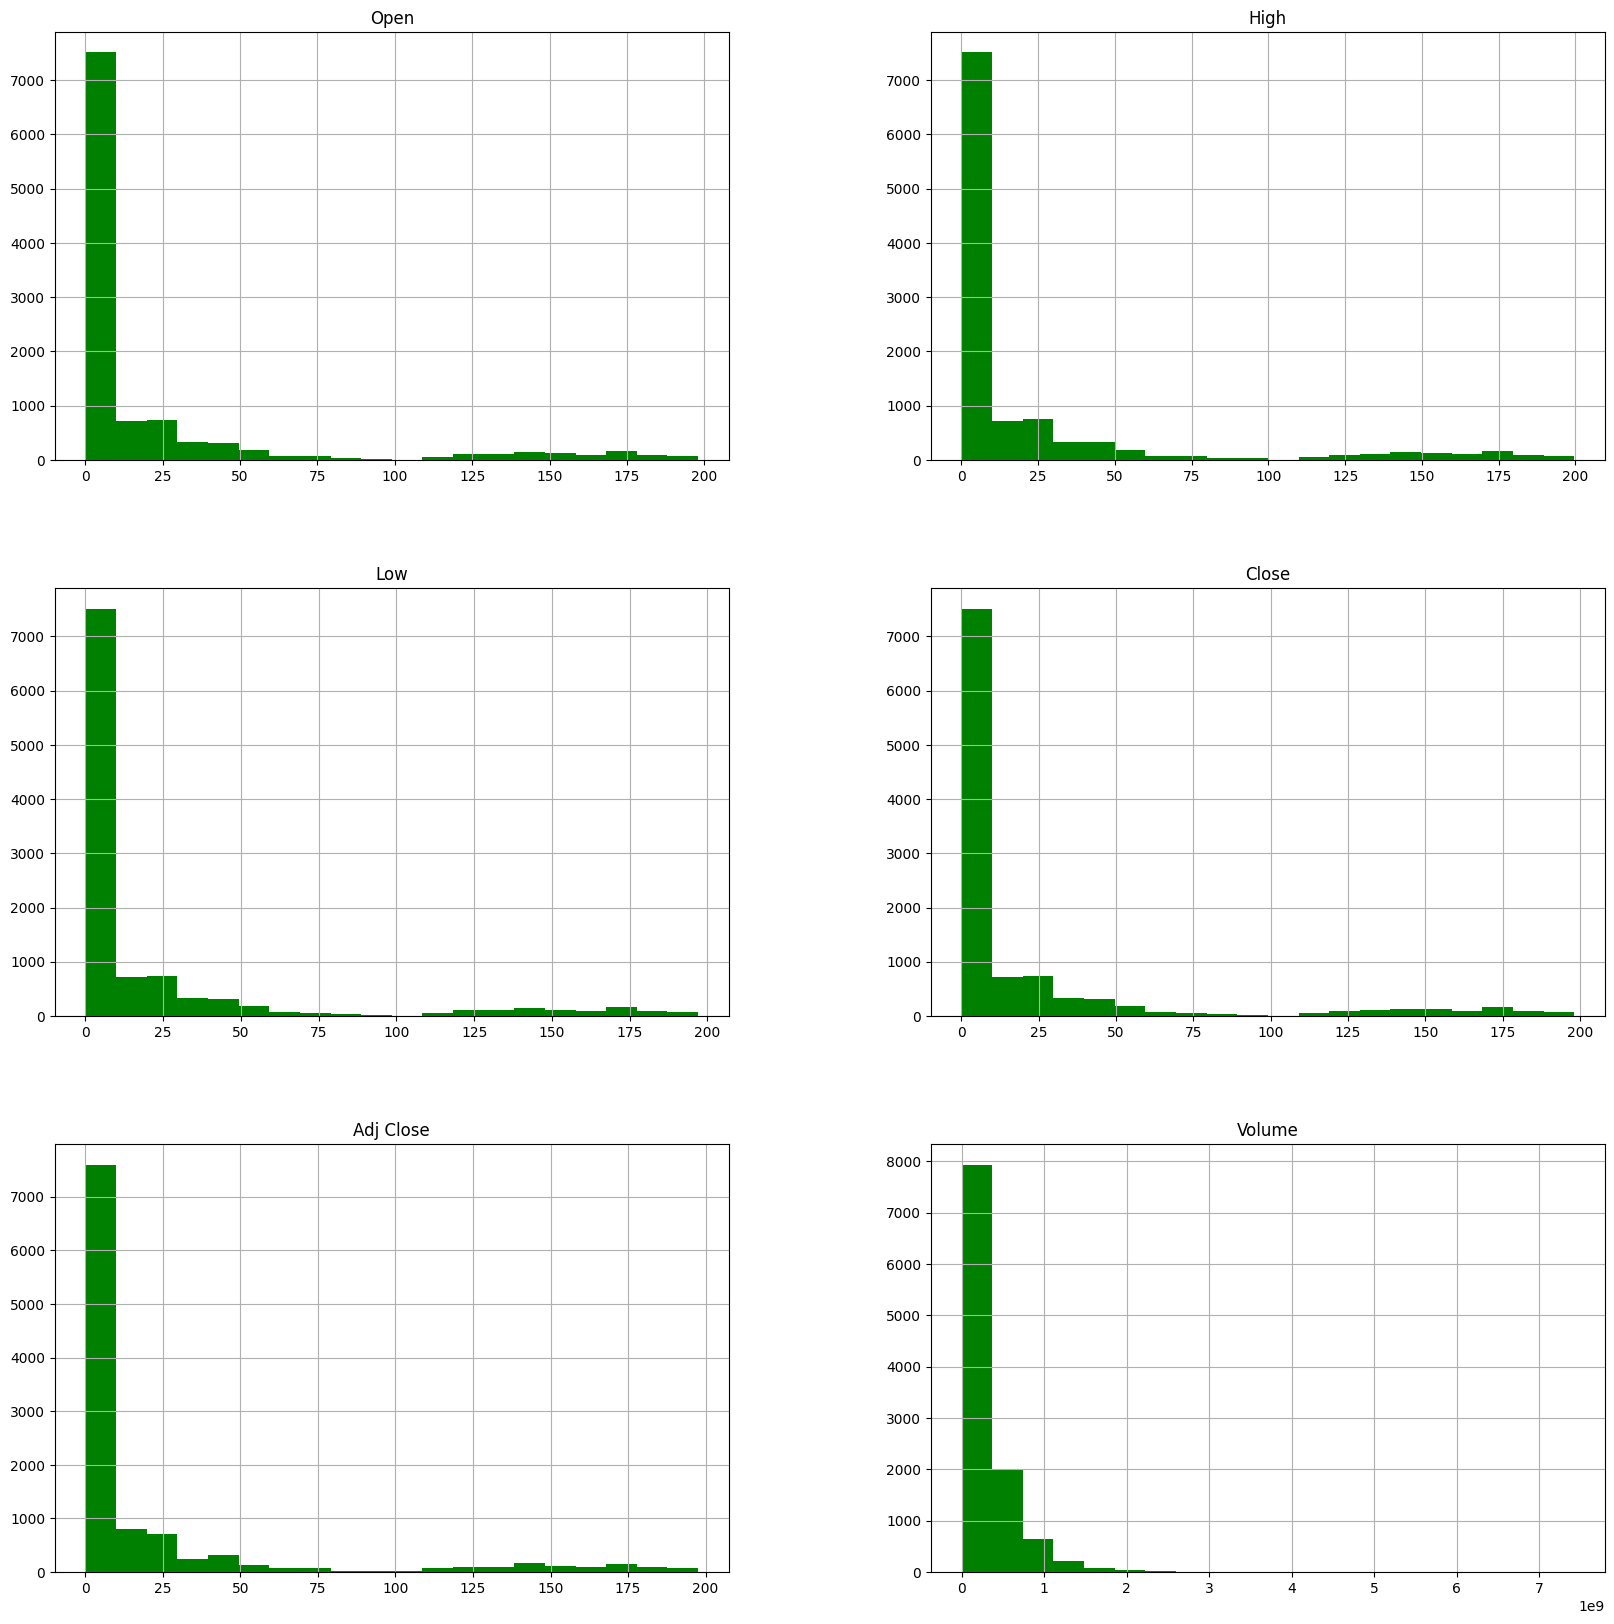

In [13]:
# Histograms of numeric columns in the dataframe
df.hist( bins = 20, figsize = (20, 20), color = 'g')
plt.show()

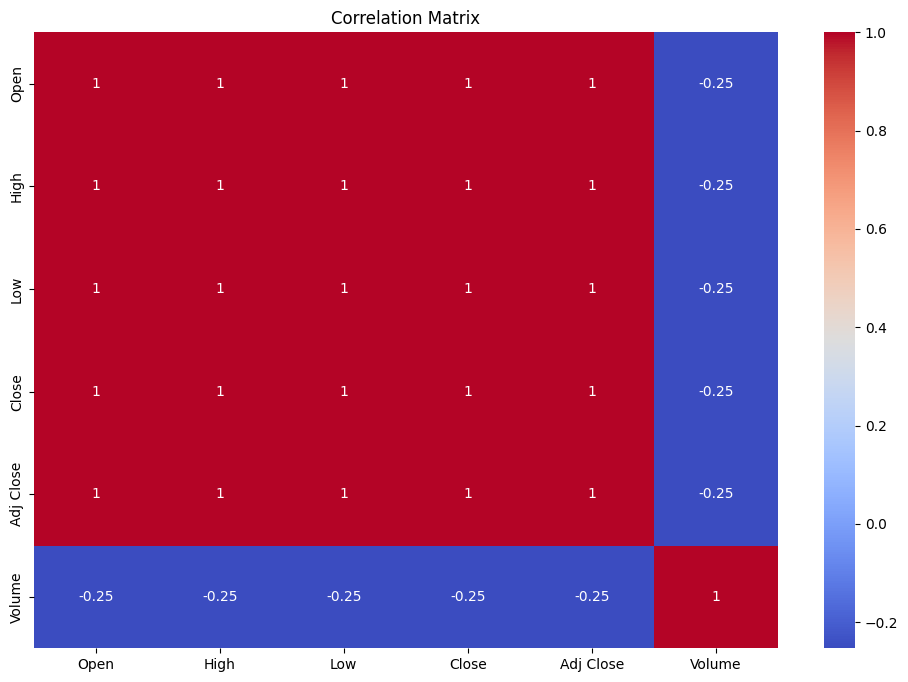

In [14]:
# Plotting a heatmap of correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns  # اختيار الأعمدة الرقمية فقط
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Maximum volume grouped by date 
df.groupby('Date')['Volume'].max()

Date
1980-12-12    469033600
1980-12-15    175884800
1980-12-16    105728000
1980-12-17     86441600
1980-12-18     73449600
                ...    
2024-05-20     44361300
2024-05-21     42309400
2024-05-22     34648500
2024-05-23     51005900
2024-05-24     36294600
Name: Volume, Length: 10954, dtype: int64

<Axes: xlabel='Date'>

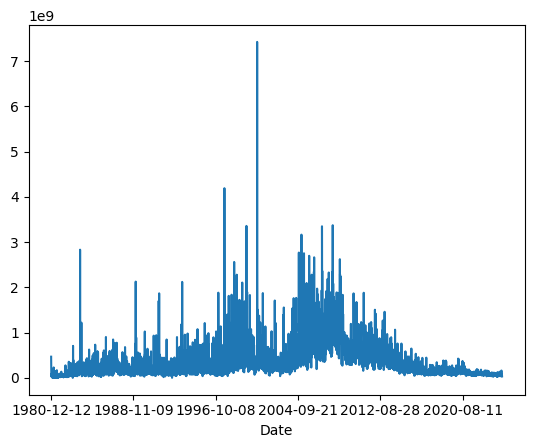

In [16]:
# Plotting maximum volume by date 
df.groupby('Date')['Volume'].max().plot()

<Figure size 2000x2000 with 0 Axes>

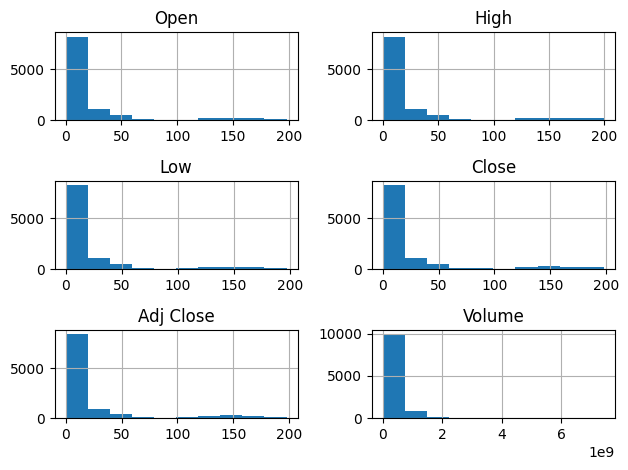

In [17]:
# Plot histograms of all columns in the dataframe
plt.figure(figsize = (20, 20))
df.hist()
plt.tight_layout()
plt.show()
